In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import scipy as sc
import statsmodels.api as sm
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cp
import stormeunice as eun
import glob
from cmcrameri import cm
import metpy
from metpy.units import units

sns.set_theme(style="white")
sns.set_style("white")
%matplotlib inline

random.seed(10)

# Import data

In [2]:
lon_min = -15
lon_max = 5
lat_min = 45
lat_max = 60

In [3]:
# ERA5
era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/sfc/2022.nc')
era5_GUST = era5_2022.fg10.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()
era5_PRES = era5_2022.msl.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()

In [4]:
inidates = ['2022-02-14']
experiments = ['incr'] #['pi', 'curr', 'incr']

for experimemt in experiments:
    for inidate in inidates:
        eps_incr = eun.data.Data.get_eps_data(experiments, inidate = inidate) # TODO: rewrite function so it can deal with multiple inidates 

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/sfc/cf/b2no_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/sfc/pf/b2no_2022-02-14.nc


In [5]:
inidates = ['2022-02-14']
experiments = ['curr'] #['pi', 'curr', 'incr']

for experimemt in experiments:
    for inidate in inidates:
        eps_curr = eun.data.Data.get_eps_data(experiments, inidate = inidate)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/cf/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/pf/1_2022-02-14.nc


In [6]:
inidates = ['2022-02-14']
experiments = ['pi'] #['pi', 'curr', 'incr']

for experimemt in experiments:
    for inidate in inidates:
        eps_pi = eun.data.Data.get_eps_data(experiments, inidate = inidate)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/sfc/cf/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/sfc/pf/b2nn_2022-02-14.nc


# Surface pressure changes with lead times

In [7]:
cc_signal_incr_curr = (eps_incr['incr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl - eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl).mean(dim=['latitude', 'longitude'])
cc_signal_pi_curr = (eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl - eps_pi['pi'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').msl).mean(dim=['latitude', 'longitude'])
# cc_signal_members = (eps_incr['incr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).msl - eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).msl).mean(dim=['latitude', 'longitude'])

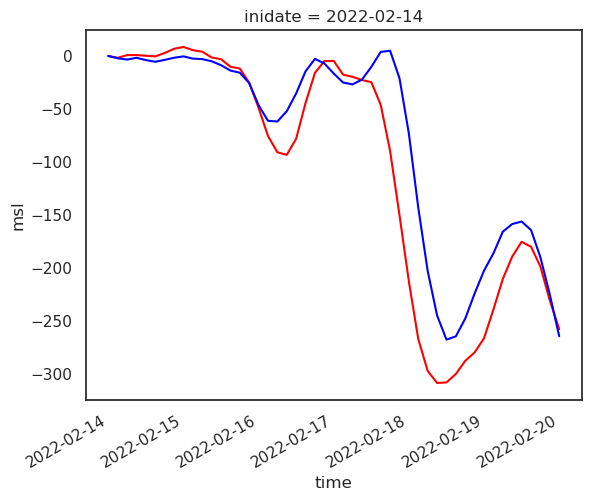

In [9]:
cc_signal_incr_curr.plot(color='red')
cc_signal_pi_curr.plot(color='blue')
# sns.move_legend(plt.gca(), loc='center left', bbox_to_anchor=(1, 0.5))

# Changes in total column water

In [10]:
cc_signal_incr_curr = (eps_incr['incr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw - eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw).mean(dim=['latitude', 'longitude'])
cc_signal_pi_curr = (eps_curr['curr'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw - eps_pi['pi'].sel(latitude = slice(lat_max, lat_min), longitude = slice(lon_min, lon_max)).mean(dim='number').tcw).mean(dim=['latitude', 'longitude'])

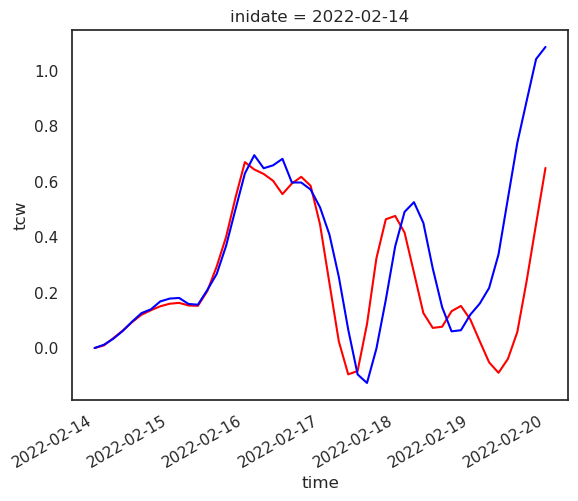

In [11]:
cc_signal_incr_curr.plot(color='red')
cc_signal_pi_curr.plot(color='blue')

# Latitudinal temperature and humidity changes

In [12]:
inidate = '2022-02-14'
experiments = ['pi', 'curr', 'incr']

eps = eun.data.Data.get_eps_pl_data(experiments, inidate = inidate, level=850)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/cf/extravars/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/pf/extravars/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/cf/extravars/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/pf/extravars/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/cf/extravars/b2no_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/pf/extravars/b2no_2022-02-14.nc


In [13]:
# ERA5
era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/sfc/2022.nc')
era5_GUST = era5_2022.fg10.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()
era5_PRES = era5_2022.msl.sel(time=slice('2022-02-07','2022-02-22'),latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).resample(time='1d').max().load()

In [14]:
experiments = ['pi', 'curr', 'incr']
eq_pot_temp = {}

for exp in experiments:
    temp = eps[exp].mean(dim=['number', 'longitude']).t
    rel_humidity = eps[exp].mean(dim=['number', 'longitude']).r
    pot_temperature = metpy.calc.potential_temperature(850 * units.hPa, temp * units.kelvin)
    dewpoint = metpy.calc.dewpoint_from_relative_humidity(temp * units.kelvin, rel_humidity * units.percent)

    eq_pot_temp[exp] = metpy.calc.equivalent_potential_temperature(850 * units.hPa, temp * units.kelvin, dewpoint)


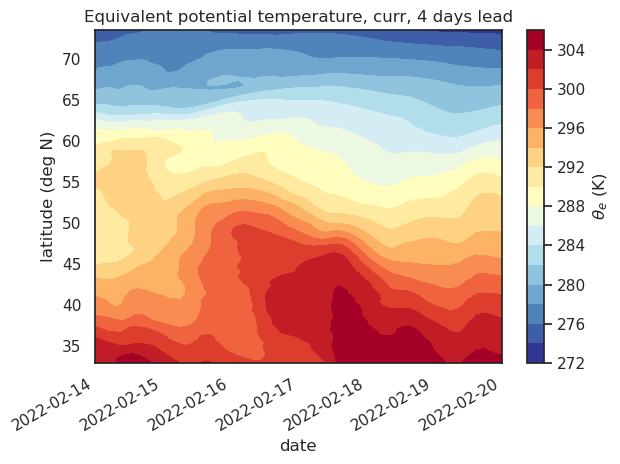

In [15]:
eq_pot_temp['curr'].plot.contourf(cmap="RdYlBu_r", x = 'time', y = 'latitude', levels = 20, cbar_kwargs = {'label' : r'$\theta_e$ (K)'})
plt.ylabel('latitude (deg N)')
plt.xlabel("date")
plt.title('Equivalent potential temperature, curr, 4 days lead')
plt.tight_layout()

# plt.savefig('figures/12_theta_e_curr_Europe_Hovmoeller_inidate_'+inidate+'.png')
# plt.savefig('figures/12_theta_e_curr_Europe_Hovmoeller_inidate_'+inidate+'.pdf')

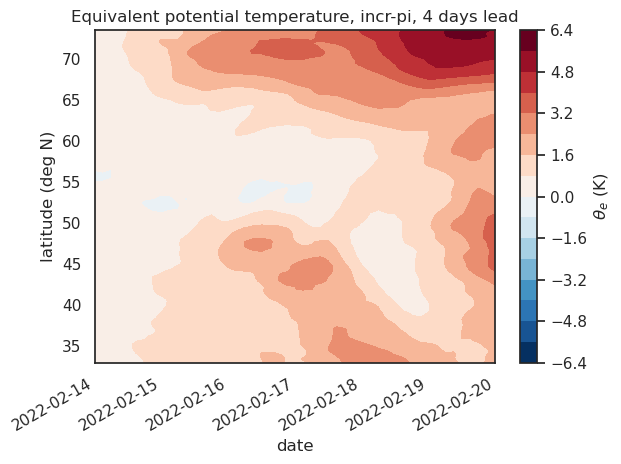

In [16]:
(eq_pot_temp['incr'] - eq_pot_temp['pi']).plot.contourf(x = 'time', y = 'latitude', levels = 20, cbar_kwargs = {'label' : r'$\Delta \theta_e$ (K)'})
plt.ylabel('latitude (deg N)')
plt.xlabel("date")
plt.title('Equivalent potential temperature, incr-pi, 4 days lead')
plt.tight_layout()

# plt.savefig('figures/12_theta_e_incr-pi_Europe_Hovmoeller_inidate_'+inidate+'.png')
# plt.savefig('figures/12_theta_e_incr-pi_Europe_Hovmoeller_inidate_'+inidate+'.pdf')

# Global data

In [2]:
def get_global_eps_data(experiments, inidate='2022-02-16', sfc=False, glo=True):
        if sfc & glo:
            directory = {'pi': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/GLO100/sfc/',
                        'curr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/GLO100/sfc/',
                        'incr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/GLO100/sfc/'}
        elif (not sfc) & glo:
            directory = {'pi': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/GLO100/pl/',
                        'curr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/GLO100/pl/',
                        'incr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/GLO100/pl/'}
        elif sfc & (not glo):
            directory = {'pi': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/sfc/',
                        'curr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/',
                        'incr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/sfc/'}
        elif (not sfc) & (not glo):
            directory = {'pi': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/',
                        'curr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/',
                        'incr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/'}

        if sfc: 
            vars = ['fg10', 'msl', 'u10', 'v10', 'u100', 'v100', 'tcw']
        else:
            vars = ['t', 'r', 'q', 'w', 'vo', 'u', 'v', 'z']

        eps = {}
        for experiment in experiments:
            exp_eps = []
            for c, cont in enumerate(['cf', 'pf']):
                for files in glob.glob(directory[experiment]+ cont + '/*'+ inidate +'*.nc'):
                    print(files)
                    data = xr.open_dataset(files)
                    exp_eps.append(eun.data.Data.preproc_ds(data.get(vars)))

            eps[experiment] = xr.concat(exp_eps, dim='number').squeeze()

        return eps

In [5]:
experiments = ['curr', 'incr']
eps = get_global_eps_data(experiments, inidate='2022-02-14')

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/GLO100/pl/cf/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/GLO100/pl/pf/1_2022-02-14.nc


In [ ]:
# figure and map setup
fs = 18
projection = ccrs.PlateCarree()

cf_min = -1
cf_max = 1

fig = plt.figure(1, figsize=(10,6))    
latitude = eps['curr'].latitude
longitude = eps['curr'].longitude

times=['2022-02-16 00', '2022-02-17 00', '2022-02-18 00', '2022-02-19 00']
leadtimes = ['48 hours', '72 hours', '96 hours', '120 hours']

for time_i, time in enumerate(times): 
    cf_vals = eps['incr'].sel(level=850, time=time).t.mean(dim='number').values
    tmp = eps['curr'].sel(level=850, time=time).t.mean(dim='number').values
    cf_vals = cf_vals - tmp

    ax = plt.subplot(2, 2, time_i+1, projection = projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('110m'), color = 'grey', zorder = 14)
    ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10
    ax.set_title('Lead time: '+leadtimes[time_i])

    clevs_cf = np.linspace(cf_min, cf_max, 20)
    cf = ax.contourf(longitude, latitude, cf_vals, clevs_cf, cmap=cm.vik,
                    transform=projection, zorder = 10, extend = 'max')

plt.suptitle('INCR-CURR')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes((0.85, 0.1, 0.03, 0.8))
fig.colorbar(cf, cax=cax,label='temperature difference (K)', pad=0.2)

NameError: name 'ccrs' is not defined

/home/e/ermis/nobackups/miniconda3/envs/storm_eunice39/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


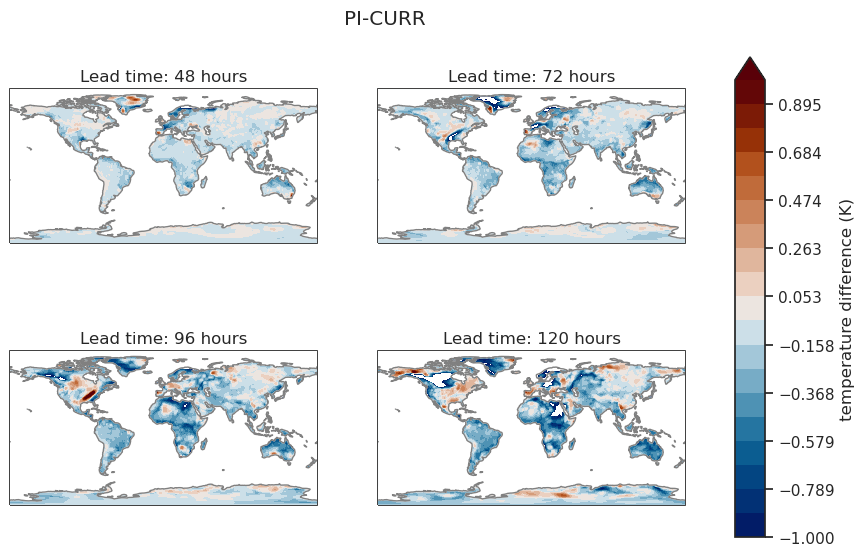

In [4]:
# figure and map setup
fs = 18
projection = ccrs.PlateCarree()

cf_min = -1
cf_max = 1

fig = plt.figure(1, figsize=(10,6))    
latitude = eps['curr'].latitude
longitude = eps['curr'].longitude

times=['2022-02-16 00', '2022-02-17 00', '2022-02-18 00', '2022-02-19 00']
leadtimes = ['48 hours', '72 hours', '96 hours', '120 hours']

for time_i, time in enumerate(times): 
    cf_vals = eps['pi'].sel(level=850, time=time).t.mean(dim='number').values
    tmp = eps['curr'].sel(level=850, time=time).t.mean(dim='number').values
    cf_vals = cf_vals - tmp

    ax = plt.subplot(2, 2, time_i+1, projection = projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('110m'), color = 'grey', zorder = 14)
    ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10
    ax.set_title('Lead time: '+leadtimes[time_i])

    clevs_cf = np.linspace(cf_min, cf_max, 20)
    cf = ax.contourf(longitude, latitude, cf_vals, clevs_cf, cmap=cm.vik,
                    transform=projection, zorder = 10, extend = 'max')

plt.suptitle('PI-CURR')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes((0.85, 0.1, 0.03, 0.8))
fig.colorbar(cf, cax=cax,label='temperature difference (K)', pad=0.2)